# Instagram fake spammer genuine accounts

1: Data Preparation

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [76]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [78]:
df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [80]:
df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [84]:
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


2: Exploratory Data Analysis (EDA)

In [86]:
df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [88]:
print("\nTraining Data Summary Statistics:")
print(df_train.describe())


Training Data Summary Statistics:
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%                

In [90]:
print("\nMissing Values in Training Data:")
print(df_train.isnull().sum())


Missing Values in Training Data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [92]:
print("\nTesting Data Info:")
print(df_test.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB
None


In [94]:
print("\nMissing Values in Testing Data:")
print(df_test.isnull().sum())


Missing Values in Testing Data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Distribution of Target Variable

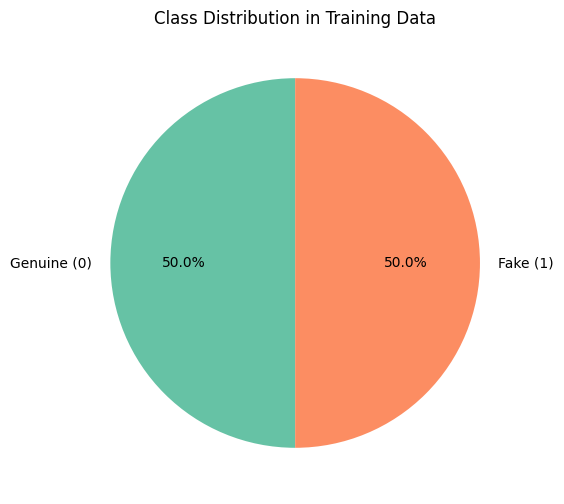

In [96]:
plt.figure(figsize=(6, 6))
df_train['fake'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Genuine (0)', 'Fake (1)'], colors=['#66c2a5', '#fc8d62'])
plt.title('Class Distribution in Training Data')
plt.ylabel('')
plt.show()


Correlation Analysis

In [98]:
corr_matrix = df_train.corr(numeric_only=True)

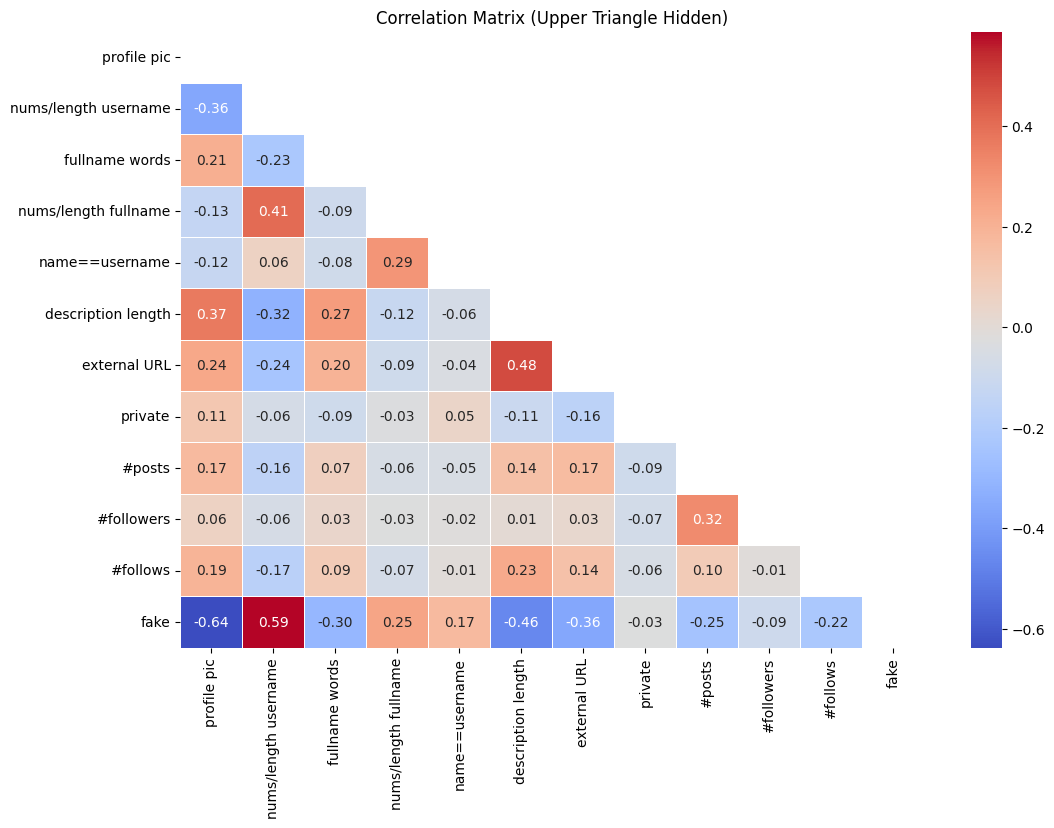

In [100]:
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Upper Triangle Hidden)')
plt.show()

In [102]:
numerical_features = ['#posts', '#followers', '#follows', 'description length']

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_5976\3148167758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fake', y=feature, data=df_train, palette='Set2')
C:\Users\Tanmay\AppData\Local\Temp\ipykernel_5976\3148167758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fake', y=feature, data=df_train, palette='Set2')
C:\Users\Tanmay\AppData\Local\Temp\ipykernel_5976\3148167758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fake', y=feature, data=df_train, palette='Set2')
C:\Users\Tanmay\AppData\Local\Temp\ipykerne

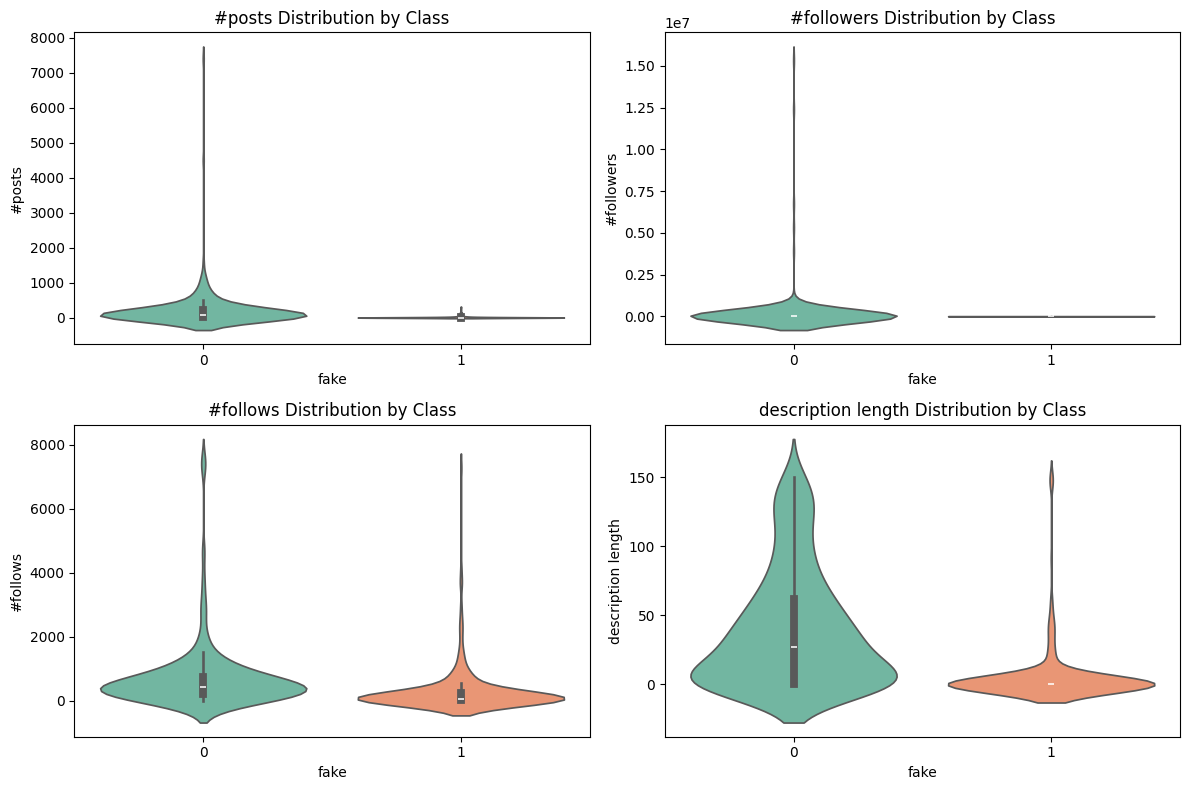

In [104]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='fake', y=feature, data=df_train, palette='Set2')
    plt.title(f'{feature} Distribution by Class')
plt.tight_layout()
plt.show()



In [106]:
subset_features = ['#posts', '#followers', '#follows', 'fake']


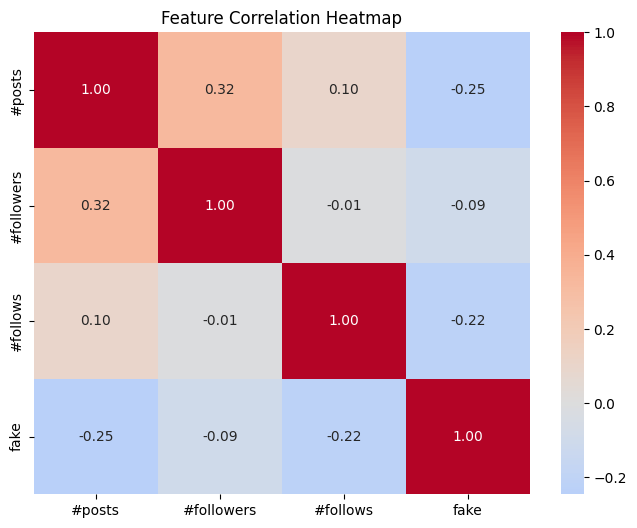

In [108]:
plt.figure(figsize=(8, 6))
corr = df_train[subset_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [110]:
print("\nClass Distribution in Testing Data:")
print(df_test['fake'].value_counts())


Class Distribution in Testing Data:
fake
0    60
1    60
Name: count, dtype: int64


3: Data Preprocessing

In [112]:
X_train = df_train.drop('fake', axis=1)
y_train = df_train['fake']
X_test = df_test.drop('fake', axis=1)
y_test = df_test['fake']

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4: Model Building

In [116]:
rf_model = RandomForestClassifier(n_estimators=200, 
                                 max_depth=10, 
                                 min_samples_split=5, 
                                 random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [118]:
y_pred = rf_model.predict(X_test_scaled)

In [120]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



5: Model Evaluation

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_5976\1324202537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='Set2')


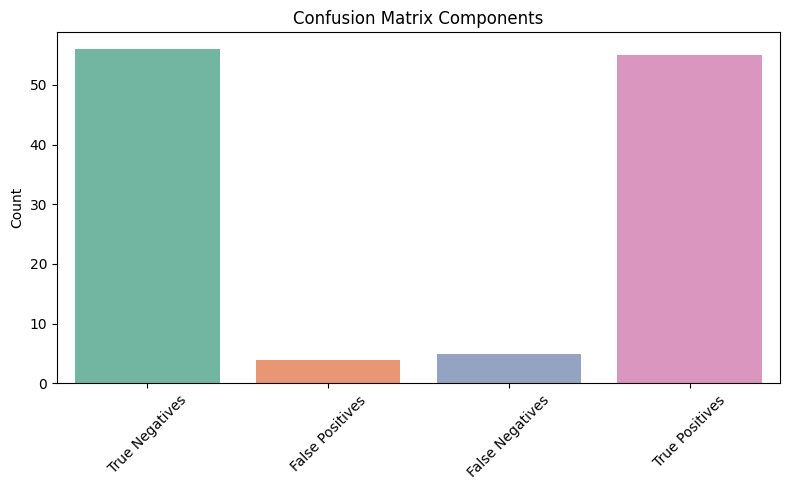

In [122]:
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values, palette='Set2')
plt.title('Confusion Matrix Components')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


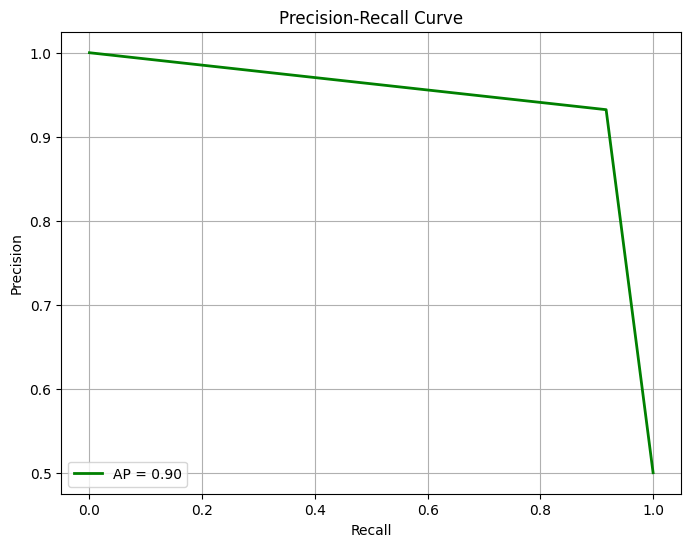

In [124]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [126]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                 Feature  Importance
9             #followers    0.306953
8                 #posts    0.226672
1   nums/length username    0.140444
0            profile pic    0.093120
5     description length    0.088430
10              #follows    0.077925
2         fullname words    0.041679
7                private    0.008238
6           external URL    0.007866
3   nums/length fullname    0.007040
4         name==username    0.001632


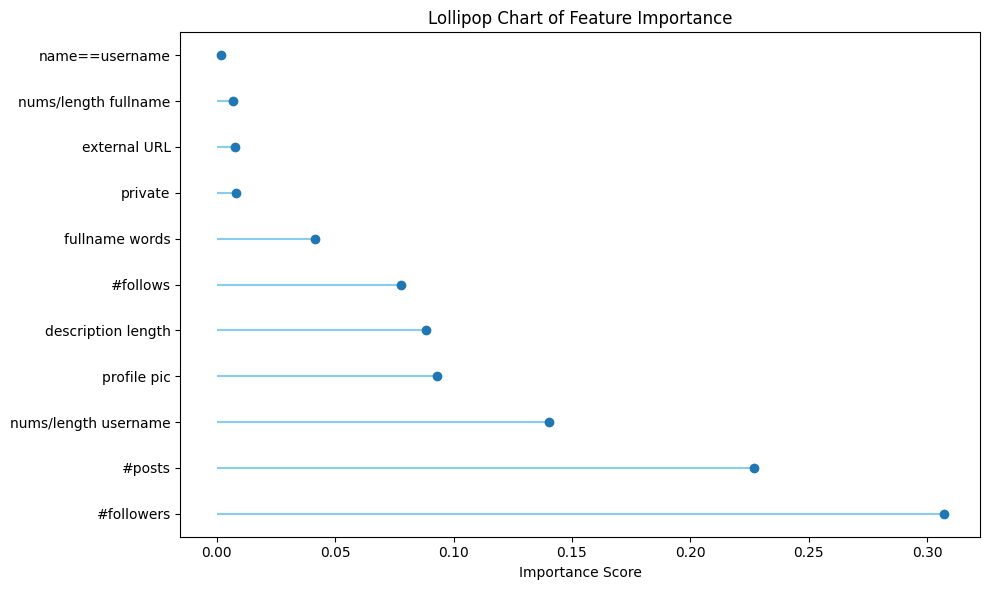

In [128]:
plt.figure(figsize=(10, 6))
plt.hlines(y=feature_importance['Feature'], xmin=0,
           xmax=feature_importance['Importance'], color='skyblue')
plt.plot(feature_importance['Importance'], feature_importance['Feature'], 'o')
plt.title('Lollipop Chart of Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

